In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
# load csv file
crypto_df = pd.read_csv('Resources/crypto_data.csv')
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# data prep and EDA
crypto_df.shape

(1252, 7)

In [4]:
crypto_df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [5]:
# filter for curriences not being traded and drop column after
crypto_df = crypto_df[crypto_df['IsTrading'] == True]
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [6]:
crypto_df = crypto_df.drop(columns ='IsTrading')
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [7]:
# checking for null values and removing null values
for column in crypto_df.columns:
    print(f"Column {column} has {crypto_df[column].isnull().sum()} null values")

Column Unnamed: 0 has 0 null values
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 459 null values
Column TotalCoinSupply has 0 null values


In [8]:
crypto_df = crypto_df.dropna()


In [9]:
for column in crypto_df.columns:
    print(f"Column {column} has {crypto_df[column].isnull().sum()} null values")

Column Unnamed: 0 has 0 null values
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 0 null values
Column TotalCoinSupply has 0 null values


In [10]:
# find mined curencies that is > 0
crypto_df = crypto_df[crypto_df["TotalCoinsMined"]> 0]
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [11]:
# drop CoinName column since it dosen't contribute towards the data
crypto_df.drop(['Unnamed: 0', 'CoinName'], axis=1, inplace= True)
crypto_df


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [12]:
# convert Algorithm and ProofType into numerical data
X = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'], drop_first=True, dtype=float)
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.055185e+09,532000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.927942e+10,314159265359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.792718e+07,21000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.076842e+08,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1242,1.493105e+07,250000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1245,9.802226e+08,1400222610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1246,7.296538e+06,21000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
X.columns

Index(['TotalCoinsMined', 'TotalCoinSupply', 'Algorithm_536',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S', 'Algorithm_Blake2b', 'Algorithm_C11',
       'Algorithm_Cloverhash', 'Algorithm_Counterparty',
       'Algorithm_CryptoNight', 'Algorithm_CryptoNight Heavy',
       'Algorithm_CryptoNight-V7', 'Algorithm_Cryptonight-GPU',
       'Algorithm_DPoS', 'Algorithm_Dagger', 'Algorithm_Dagger-Hashimoto',
       'Algorithm_ECC 256K1', 'Algorithm_Equihash',
       'Algorithm_Equihash+Scrypt', 'Algorithm_Ethash', 'Algorithm_Exosis',
       'Algorithm_Green Protocol', 'Algorithm_Groestl', 'Algorithm_HMQ1725',
       'Algorithm_HybridScryptHash256', 'Algorithm_IMesh',
       'Algorithm_Jump Consistent Hash', 'Algorithm_Keccak',
       'Algorithm_Leased POS', 'Algorithm_Lyra2RE', 'Algorithm_Lyra2REv2',
       'Algorithm_Lyra2Z', 'Algorithm_M7 POW', 'Algorithm_Multiple',
       'Algorithm_NIST5', 'Algorithm_NeoScrypt', 'Algorithm_Ouroboros',
   

In [14]:
# standardize the dataset
scaler = StandardScaler()
crypto_scaled_df = scaler.fit_transform(X)

In [15]:
# check for num of features
len(X.columns)

96

In [16]:
# dimensionality and reduction using PCA to retain 90% of features
pca = PCA(n_components=0.90)
crypto_pca = pca.fit_transform(crypto_scaled_df)
crypto_pca

array([[-3.35913620e-01,  1.04340531e+00, -5.37409264e-01, ...,
         3.42870403e-15,  1.64301206e-16, -1.05785907e-15],
       [-3.19248850e-01,  1.04354697e+00, -5.37804309e-01, ...,
         2.85569626e-15, -1.45016921e-15, -6.05688175e-16],
       [ 2.30471594e+00,  1.66999561e+00, -6.24076993e-01, ...,
        -6.76226269e-14,  5.15830941e-15,  8.68545335e-14],
       ...,
       [ 3.24179380e-01, -2.32278089e+00,  3.87363001e-01, ...,
         3.78021325e-14,  2.53217047e-14, -2.72768066e-14],
       [-1.49546262e-01, -2.05899360e+00,  3.79619710e-01, ...,
        -1.57193393e-15, -4.85799830e-15,  6.01172705e-16],
       [-2.90587486e-01,  8.27023611e-01, -2.51533368e-01, ...,
        -6.50800672e-17, -5.00149795e-15, -1.97709761e-16]])

In [17]:
# transform PCA data to a dataframe
crypto_pca_df = pd.DataFrame(data=crypto_pca)
crypto_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335914,1.043405,-0.537409,0.001347,-9.703047e-15,-4.368922e-14,-0.013578,-1.329940,-0.053106,-0.333927,...,1.393636e-15,5.075695e-15,-6.955377e-15,1.553779e-15,4.161184e-15,2.977926e-15,1.075904e-15,3.428704e-15,1.643012e-16,-1.057859e-15
1,-0.319249,1.043547,-0.537804,0.001337,-9.578915e-15,-4.368958e-14,-0.014190,-1.332705,-0.057966,-0.330612,...,1.447711e-15,6.175234e-15,-5.688423e-15,1.397146e-15,3.221071e-15,4.936477e-15,1.327190e-15,2.855696e-15,-1.450169e-15,-6.056882e-16
2,2.304716,1.669996,-0.624077,0.004420,-1.623894e-14,-5.600590e-14,-0.062312,-1.554093,-0.945690,0.375087,...,4.318144e-15,-4.457516e-14,4.641250e-14,6.014118e-14,8.029337e-14,3.253353e-16,-1.428516e-14,-6.762263e-14,5.158309e-15,8.685453e-14
3,-0.145455,-1.323925,0.177429,-0.001167,4.991207e-15,1.401225e-14,0.000326,0.283548,0.252906,-0.079820,...,3.253621e-15,-5.175068e-15,3.752730e-15,8.043570e-15,9.205757e-15,-2.984032e-15,1.102742e-15,-8.069258e-15,1.200690e-14,1.115546e-14
4,-0.151951,-2.044976,0.364208,-0.001636,8.225250e-15,3.475077e-14,0.032350,0.524429,0.191031,0.074021,...,2.543572e-14,7.291348e-14,6.936451e-15,6.640463e-14,1.001087e-13,-4.507050e-14,1.269177e-13,4.761129e-14,6.124283e-16,-2.801004e-14


In [18]:
# fetch the explained variance
pca.explained_variance_ratio_

array([0.02851314, 0.02183228, 0.02093007, 0.02087258, 0.02087257,
       0.02087257, 0.02085124, 0.01910435, 0.0179288 , 0.01777379,
       0.01662938, 0.01629408, 0.01583495, 0.01464966, 0.0134856 ,
       0.01262337, 0.01231377, 0.01127287, 0.01093674, 0.01070932,
       0.01062572, 0.01060732, 0.01059359, 0.0105697 , 0.01055562,
       0.01051051, 0.01049655, 0.01049558, 0.01049558, 0.01049558,
       0.01049381, 0.01048438, 0.01047714, 0.01047581, 0.01047329,
       0.01047115, 0.01046928, 0.01046411, 0.01046265, 0.01045618,
       0.01045597, 0.01045597, 0.01045525, 0.01045351, 0.01044982,
       0.01044805, 0.0104431 , 0.01043743, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628])

In [19]:
# further reduce the dataset with t-SNE
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(crypto_pca_df)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [20]:
# check the dataset has 2 columns
tsne_features.shape

(532, 2)

In [21]:
# the first column of transformed features
crypto_pca_df['x'] = tsne_features[:,0]

# the second column of transformed features
crypto_pca_df['y'] = tsne_features[:,1]

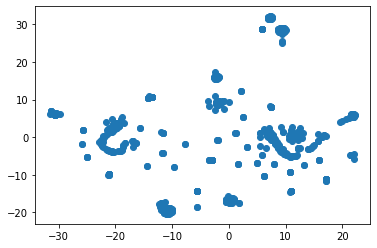

In [22]:
# visualize the clusters
plt.scatter(crypto_pca_df['x'], crypto_pca_df['y'])
plt.show()

In [23]:
# cluster analysis w/k-means
inertia = []
k = list(range(1, 11))

# calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support name

,k,inertia
0,1,236768.261945
1,2,147064.556067
2,3,103974.043503
3,4,79719.318606
4,5,68120.905561


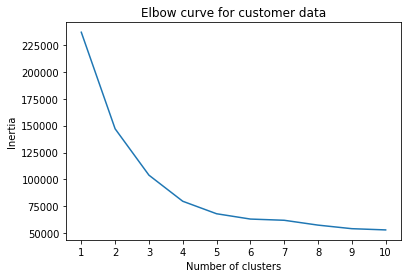

In [24]:
 # plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

Based on the graph the best 'k" value to use is 4 as it is where its inertia trajectory begins to change

Recommendation:
Based on my findings, cryptocurrencies can be cluster into 4 distinct groups as proven with the dataset provided.